In [38]:
from PIL import Image
import numpy as np
import os

In [39]:
def LoadData(path):
    files = os.listdir(path)
    flag = 1
    for i in range(len(files)):
        currentFile = path+str(i)+".jpg"
        #print(currentFile)
        img = Image.open(currentFile)
        imgGray = img.convert('L')
        imgArray =  np.array(imgGray)
        if (flag == 1):
            flag = 0
            data = imgArray.reshape([1, -1])
        else:
            data = np.append(data, imgArray.reshape([1, -1]), axis = 0)
    return data
path = "DataProcessed_Famous/train/"
data = LoadData(path)
print("读取训练数据完成，数据大小为", data.shape)

读取训练数据完成，数据大小为 (100, 2500)


In [40]:
def PCA(X, components):
    # 去中心化
    XMeaned = X - np.mean(X, axis=0)
    # 计算协方差矩阵
    covMat = np.cov(XMeaned, rowvar=False)
    # 计算特征值和特征向量
    eigenValues, eigenVectors = np.linalg.eig(covMat)
    #eigenValues = np.real(eigenValues)
    #eigenVectors = np.real(eigenVectors)
    # 对特征值排序
    sortedIndex = np.argsort(eigenValues)[::-1]
    sortedEigenvalue = eigenValues[sortedIndex]
    sortedEigenvectors = eigenVectors[:,sortedIndex]
    # 取前 num_components 个特征向量
    eigenvectorSubset = np.real(sortedEigenvectors[:, 0:components])
    # 转换数据到新空间
    XReduced = np.dot(XMeaned, eigenvectorSubset)
    return XReduced,eigenvectorSubset
#输入数据 X 和要保留的主成分数 num_components。
#函数会首先对数据进行去中心化处理，然后计算协方差矩阵，接着求解特征值和特征向量，对特征值进行排序，选择前 num_components 个特征向量，
#最后将数据投影到这些特征向量所构成的新空间。函数返回投影后的数据 X_reduced。
processedTrain,eigenvectorSubset = PCA(data, 50)
processedTrain = processedTrain
print("PCA完成，选取前50特征，降维后的数据集大小为：", processedTrain.shape)

PCA完成，选取前50特征，降维后的数据集大小为： (100, 50)


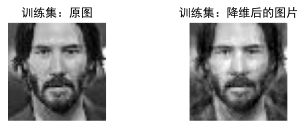

In [41]:
import matplotlib.pyplot as plt
# 支持中文，高清显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format='svg'

def InversePCA(XReduced, eigenvectors, XMean):
    # 将数据从新空间转换回原始空间
    XOriginal = np.dot(eigenvectors, XReduced.T).T
    # 重新添加均值
    XOriginal = XOriginal + XMean
    return XOriginal
#函数接受三个参数：PCA主成分分析后得到的降维后的数据 X_reduced，
#PCA主成分分析得到的特征向量 eigenvectors，以及 PCA 主成分分析前原始数据的均值 X_mean。
#函数将数据从新空间转换回原始空间，然后重新添加均值，最后返回原始数据。
rawImg = data[30].reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = InversePCA(processedTrain, eigenvectorSubset, np.mean(data, axis=0))
inverseImg = inverseData[30].reshape(50,50)
#print(inverseImg)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.axis('off')
ax0.set_title("训练集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(222)
ax1.axis('off')
ax1.set_title("训练集：降维后的图片")
ax1.imshow(inverseImg, cmap = "gray")

In [42]:
def TransformPCA(X, eigenvectors, XMean):
    return np.dot(X-XMean, eigenvectors)

In [43]:
def d_ou(v1,v2):  #np.dot(v1,v2) == np.sum(v1*v2)
    v1=np.array(v1)
    v2=np.array(v2)
    return np.sqrt(np.dot((v1-v2),(v1-v2)))
    #return np.sqrt(np.sum((v1-v2)*(v1-v2)))

测试照片与 肖战 的平均欧式距离是： 3175.9614414754783
测试照片与 泽连斯基 的平均欧式距离是： 3191.029210770705
测试照片与 甄子丹 的平均欧式距离是： 3623.8059920807837
测试照片与 John Wick 的平均欧式距离是： 4222.1610221192805
测试照片与 StarLight 的平均欧式距离是： 2094.9620180875254
测试照片与 Lance 的平均欧式距离是： 4980.404244218495
测试照片与 Homelander 的平均欧式距离是： 3721.391130310511
测试照片与 A-Train 的平均欧式距离是： 4163.183674752424
测试照片与 Billy 的平均欧式距离是： 5223.513537099385
测试照片与 Luke Skywalker 的平均欧式距离是： 4800.814371370618

欧氏距离最小为： 2094.9620180875254 ,即测试照片预测为： StarLight 
测试照片实际上是 StarLight


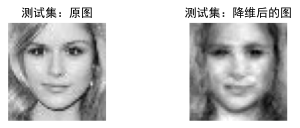

In [46]:
#使用测试集图片进行测试
nameList = ["肖战", "泽连斯基", "甄子丹", "John Wick", "StarLight", "Lance", "Homelander", "A-Train", "Billy", "Luke Skywalker"]
name = 4
img = Image.open("DataProcessed_Famous/test/" + str(name) + ".jpg")
imgGray = img.convert('L')
test =  np.array(imgGray).reshape([1, -1])
processedTest = TransformPCA(test, eigenvectorSubset, np.mean(data, axis=0))
#print(processedTest.shape)
verify = processedTest

#测试照片可视化
rawImg = test.reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = InversePCA(processedTest, eigenvectorSubset, np.mean(data, axis=0))
inverseImg = inverseData[0].reshape(50,50)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.axis('off')
ax0.set_title("测试集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(222)
ax1.axis('off')
ax1.set_title("测试集：降维后的图")
ax1.imshow(inverseImg, cmap = "gray")

minDis = 1e9
dis = []
for i in range(processedTrain.shape[0]):
    dis.append(d_ou(processedTrain[i],verify[0]))
averageDis = 0
for i in range(len(dis)):
    averageDis = averageDis + dis[i]
    #print(i)
    if((i + 1) % 10 == 0):
        averageDis = averageDis/10
        print("测试照片与", nameList[int((i + 1) / 10) - 1],"的平均欧式距离是：", averageDis)
        if(averageDis < minDis):
            minDis = averageDis
            ansName = int((i + 1) / 10) - 1
        averageDis = 0
print("\n欧氏距离最小为：",minDis,",即测试照片预测为：",nameList[ansName], "\n测试照片实际上是", nameList[name])

测试照片与 肖战 的平均欧式距离是： 4053.663334917218
测试照片与 泽连斯基 的平均欧式距离是： 3850.3200121826603
测试照片与 甄子丹 的平均欧式距离是： 4019.158408859136
测试照片与 John Wick 的平均欧式距离是： 4545.418367062195
测试照片与 StarLight 的平均欧式距离是： 3746.6244803251734
测试照片与 Lance 的平均欧式距离是： 3254.959462832846
测试照片与 Homelander 的平均欧式距离是： 3945.38377895179
测试照片与 A-Train 的平均欧式距离是： 2728.7251568057172
测试照片与 Billy 的平均欧式距离是： 4522.154900863457
测试照片与 Luke Skywalker 的平均欧式距离是： 4265.6479606379535

欧氏距离最小为： 2728.7251568057172 ,即测试照片预测为： A-Train 
测试照片实际上是 A-Train


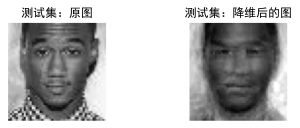

In [49]:
#使用测试集图片进行测试
nameList = ["肖战", "泽连斯基", "甄子丹", "John Wick", "StarLight", "Lance", "Homelander", "A-Train", "Billy", "Luke Skywalker"]
name = 7
img = Image.open("DataProcessed_Famous/test/" + str(name) + ".jpg")
imgGray = img.convert('L')
test =  np.array(imgGray).reshape([1, -1])
processedTest = TransformPCA(test, eigenvectorSubset, np.mean(data, axis=0))
#print(processedTest.shape)
verify = processedTest

#测试照片可视化
rawImg = test.reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = InversePCA(processedTest, eigenvectorSubset, np.mean(data, axis=0))
inverseImg = inverseData[0].reshape(50,50)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.axis('off')
ax0.set_title("测试集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(222)
ax1.axis('off')
ax1.set_title("测试集：降维后的图")
ax1.imshow(inverseImg, cmap = "gray")

minDis = 1e9
dis = []
for i in range(processedTrain.shape[0]):
    dis.append(d_ou(processedTrain[i],verify[0]))
averageDis = 0
for i in range(len(dis)):
    averageDis = averageDis + dis[i]
    #print(i)
    if((i + 1) % 10 == 0):
        averageDis = averageDis/10
        print("测试照片与", nameList[int((i + 1) / 10) - 1],"的平均欧式距离是：", averageDis)
        if(averageDis < minDis):
            minDis = averageDis
            ansName = int((i + 1) / 10) - 1
        averageDis = 0
print("\n欧氏距离最小为：",minDis,",即测试照片预测为：",nameList[ansName], "\n测试照片实际上是", nameList[name])